In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'SMA')

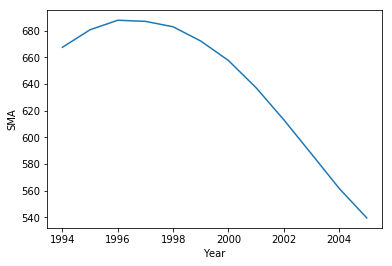

In [61]:
# Question 1
measure = pd.read_excel("MeasurementData_Q1.xlsx")
# (a)
m = measure["Measurement"]
arr=[]
for i in range(measure.shape[0]-10):
    arr.append(sum(m[i:i+11])/11)
plt.plot(measure["Year"][10:],arr)
plt.xlabel("Year")
plt.ylabel("SMA")

Text(0,0.5,'SMA')

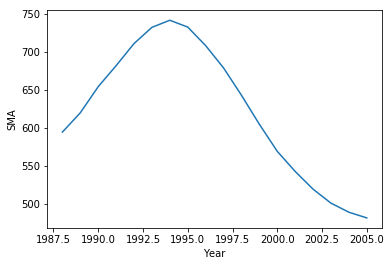

In [62]:
# (b)
arr2=[]
for i in range(measure.shape[0]-4):
    arr2.append(sum(m[i:i+5])/5)
plt.plot(measure["Year"][4:],arr2)
plt.xlabel("Year")
plt.ylabel("SMA")

In [63]:
# (c) We can see that with smaller N, the simple moving average reacts faster 
#     respond to the data, less smooth, and have larger variability

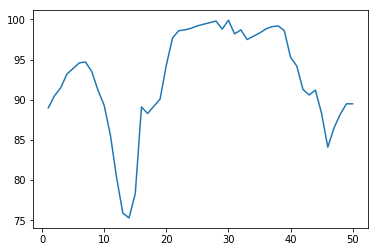

In [64]:
# Question 3
y = pd.read_excel("Yield_Data.xlsx")
plt.plot(y["Hour"],y["Yield, %"])

In [65]:
# set y0=y1
def expo_smooth(data,lamda):
    result=[]
    result.append(data[0])
    for i in range(len(data)):
        es=lamda*data[i]+(1-lamda)*result[i]
        result.append(es)
    result.pop(0)
    return result

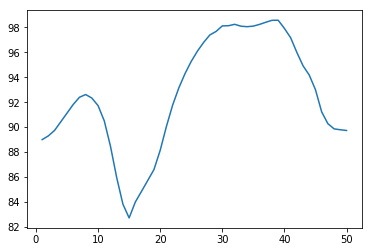

In [66]:
# (a)
expo = expo_smooth(y["Yield, %"],0.2)
plt.plot(y["Hour"],expo)

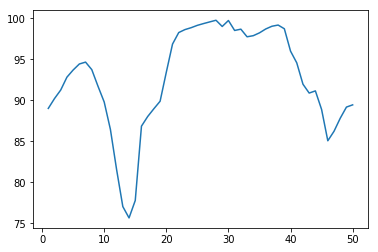

In [67]:
# (b)
expo2 = expo_smooth(y["Yield, %"],0.8)
plt.plot(y["Hour"],expo2)

In [68]:
# (c)
def msd(orig,expo):
    result=0
    for i in range(len(orig)):
        square = (orig[i]-expo[i])*(orig[i]-expo[i])
        result += square
    return result/len(orig)

In [69]:
# mean square difference of original data and lamda=0.2
msd(y["Yield, %"],expo)

15.671048945737006

In [70]:
# mean square difference of original data and lamda=0.8
msd(y["Yield, %"],expo2)

0.2950579416051249

In [59]:
# So with lamda=0.8, it produces a lower error.